In [13]:
%matplotlib inline
import wbdata
import pandas
import datetime
import matplotlib.pyplot as plt
import matplotlib

In [14]:
"""Let’s say we want to find some data for the ease of doing business in some well-off countries. 
I might start off by seeing what sources are available and look promising:"""
wbdata.get_source()

11	Africa Development Indicators
36	Statistical Capacity Indicators
31	Country Policy and Institutional Assessment (CPIA) 
41	Country Partnership Strategy for India 
26	Corporate Scorecard
1 	Doing Business
30	Exporter Dynamics Database: Country-Year
12	Education Statistics
13	Enterprise Surveys
28	Global Findex ( Global Financial Inclusion database)
33	G20 Basic Set of Financial Inclusion Indicators
14	Gender Statistics
15	Global Economic Monitor
27	GEP Economic Prospects
32	Global Financial Development
21	Global Economic Monitor (GEM) Commodities
34	Global Partnership for Education
29	Global Social Protection
16	Health Nutrition and Population Statistics
39	Health Nutrition and Population Statistics by Wealth Quintile
40	Health Nutrition and Population Statistics: Population estimates and projections
18	International Development Association - Results Measurement System
45	INDO-DAPOER
6 	International Debt Statistics
25	Jobs for Knowledge Platform
37	LAC Equity Lab
19	Millennium Devel

In [15]:
"""Well, that “Doing Business”—source 1—looks like a winner. Let’s see what we’ve got available to us there."""
wbdata.get_indicator(source=3)

CC.EST          	Control of Corruption: Estimate
CC.NO.SRC       	Control of Corruption: Number of Sources
CC.PER.RNK      	Control of Corruption: Percentile Rank
CC.PER.RNK.LOWER	Control of Corruption: Percentile Rank, Lower Bound of 90% Confidence Interval
CC.PER.RNK.UPPER	Control of Corruption: Percentile Rank, Upper Bound of 90% Confidence Interval
CC.STD.ERR      	Control of Corruption: Standard Error
GE.EST          	Government Effectiveness: Estimate
GE.NO.SRC       	Government Effectiveness: Number of Sources
GE.PER.RNK      	Government Effectiveness: Percentile Rank
GE.PER.RNK.LOWER	Government Effectiveness: Percentile Rank, Lower Bound of 90% Confidence Interval
GE.PER.RNK.UPPER	Government Effectiveness: Percentile Rank, Upper Bound of 90% Confidence Interval
GE.STD.ERR      	Government Effectiveness: Standard Error
PV.EST          	Political Stability and Absence of Violence/Terrorism: Estimate
PV.NO.SRC       	Political Stability and Absence of Violence/Terrorism: Number of

In [16]:
"""But let’s say I’m in the early stages of developing a question and go for the most general measure, 
which is the first one, the “Ease of Doing Business Index”, which has the id “IC.BUS.EASE.XQ”.
Now remember, we’re only interested in high-income countries right now, because we’re elitist. 
So let’s use one of the convenience search functions to figure out the code for the United States 
so we don’t have to wait for data from a bunch of other countries:"""
wbdata.search_countries("brazil")

BRA	Brazil


In [17]:
"""get our data:"""
wbdata.get_data("RQ.EST", country="BRA")

[{u'country': {u'id': u'BR', u'value': u'Brazil'},
  u'date': u'2014',
  u'decimal': u'0',
  u'indicator': {u'id': u'RQ.EST', u'value': u'Regulatory Quality: Estimate'},
  u'value': u'-0.0726001933217049'},
 {u'country': {u'id': u'BR', u'value': u'Brazil'},
  u'date': u'2013',
  u'decimal': u'0',
  u'indicator': {u'id': u'RQ.EST', u'value': u'Regulatory Quality: Estimate'},
  u'value': u'0.063942976295948'},
 {u'country': {u'id': u'BR', u'value': u'Brazil'},
  u'date': u'2012',
  u'decimal': u'0',
  u'indicator': {u'id': u'RQ.EST', u'value': u'Regulatory Quality: Estimate'},
  u'value': u'0.0873545929789543'},
 {u'country': {u'id': u'BR', u'value': u'Brazil'},
  u'date': u'2011',
  u'decimal': u'0',
  u'indicator': {u'id': u'RQ.EST', u'value': u'Regulatory Quality: Estimate'},
  u'value': u'0.167918607592583'},
 {u'country': {u'id': u'BR', u'value': u'Brazil'},
  u'date': u'2010',
  u'decimal': u'0',
  u'indicator': {u'id': u'RQ.EST', u'value': u'Regulatory Quality: Estimate'},
  u'val

In [27]:
"""And that will return a big long list of dictionaries with all the relevant data 
and metadata as organized by the World Bank. Now let’s say we want to look at the United Kingdom 
as well (“GBR”, see above), and only for the years 2010-2011. We can actually search using multiple 
countries and restrict the dates using datetime objects. Here’s what that would look like:"""
data_date = (datetime.datetime(2010, 1, 1), datetime.datetime(2014, 1, 1))
wbdata.get_data("RQ.EST", country=("BRA"), data_date=data_date)

[{u'country': {u'id': u'BR', u'value': u'Brazil'},
  u'date': u'2014',
  u'decimal': u'0',
  u'indicator': {u'id': u'RQ.EST', u'value': u'Regulatory Quality: Estimate'},
  u'value': u'-0.0726001933217049'},
 {u'country': {u'id': u'BR', u'value': u'Brazil'},
  u'date': u'2013',
  u'decimal': u'0',
  u'indicator': {u'id': u'RQ.EST', u'value': u'Regulatory Quality: Estimate'},
  u'value': u'0.063942976295948'},
 {u'country': {u'id': u'BR', u'value': u'Brazil'},
  u'date': u'2012',
  u'decimal': u'0',
  u'indicator': {u'id': u'RQ.EST', u'value': u'Regulatory Quality: Estimate'},
  u'value': u'0.0873545929789543'},
 {u'country': {u'id': u'BR', u'value': u'Brazil'},
  u'date': u'2011',
  u'decimal': u'0',
  u'indicator': {u'id': u'RQ.EST', u'value': u'Regulatory Quality: Estimate'},
  u'value': u'0.167918607592583'},
 {u'country': {u'id': u'BR', u'value': u'Brazil'},
  u'date': u'2010',
  u'decimal': u'0',
  u'indicator': {u'id': u'RQ.EST', u'value': u'Regulatory Quality: Estimate'},
  u'val

In [28]:
"""Let’s say we want to fetch this same indicator, but also gdp per capita and for all OECD countries. 
Let’s find the other indicator we want using another convenience search function:"""
wbdata.search_indicators("rule of law")

GV.RULE.LW.ES   	Rule of Law (estimate)
GV.RULE.LW.NO   	Rule of Law (number off surveys/polls)
GV.RULE.LW.SE   	Rule of Law (standard error)
MO.INDEX.SRLW.XQ	Safety and Rule of Law
RL.EST          	Rule of Law: Estimate
RL.NO.SRC       	Rule of Law: Number of Sources
RL.PER.RNK      	Rule of Law: Percentile Rank
RL.PER.RNK.LOWER	Rule of Law: Percentile Rank, Lower Bound of 90% Confidence Interval
RL.PER.RNK.UPPER	Rule of Law: Percentile Rank, Upper Bound of 90% Confidence Interval
RL.STD.ERR      	Rule of Law: Standard Error


In [9]:
"""Like good economists, we’ll use the one that seems most impressive: 
GDP per Capita at PPP in constant 2005 dollars, which has the id “NY.GDP.PCAP.PP.KD”. 
But what about using OECD countries?"""
wbdata.get_incomelevel()

HIC	High income
HPC	Heavily indebted poor countries (HIPC)
INX	Not classified
LIC	Low income
LMC	Lower middle income
LMY	Low & middle income
MIC	Middle income
NOC	High income: nonOECD
OEC	High income: OECD
UMC	Upper middle income


In [36]:
"""Finally, let’s make sure we get our data into a lovely merged pandas DataFrame, 
suitable for analysis with that library, statsmodels, or whatever else we’d like."""
countries = [i['id'] for i in wbdata.get_country(incomelevel="NOC", display=False)]
indicators = {"RQ.EST": "regulatory_quality"}
df = wbdata.get_dataframe(indicators, country=countries, convert_date=True)
df.describe()

,regulatory_quality
count,550.000000
mean,0.655374
std,0.788029
min,-1.805823
25%,0.312206
50%,0.738411
75%,1.173457
max,2.247353


In [37]:
df = df.dropna()
df.corr(df.regulatory_quality)

/home/alejandra/miniconda2/envs/python2/lib/python2.7/site-packages/pandas/core/ops.py:714: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [35]:
"""#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable"""
dfu = df.unstack(level=0)

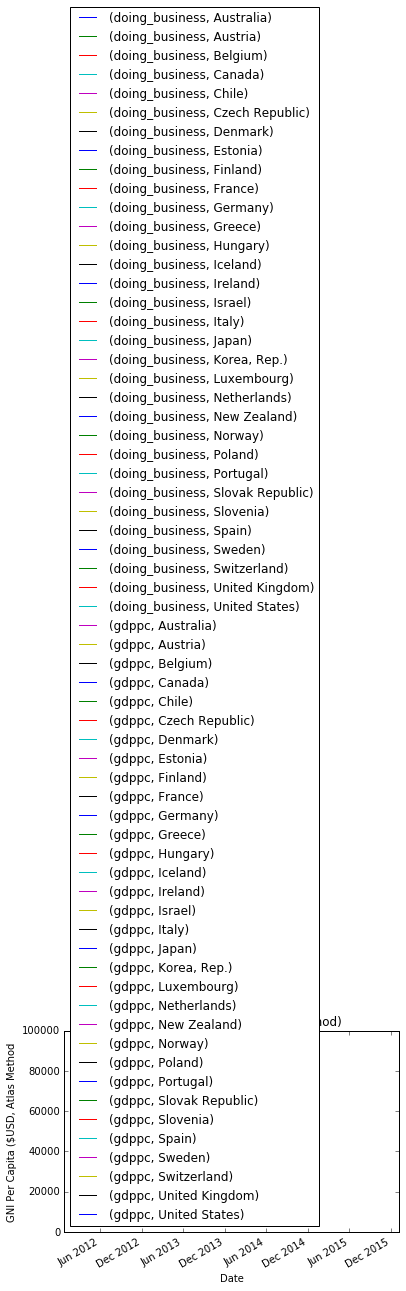

In [14]:
"""# a simple matplotlib plot with legend, labels and a title"""
dfu.plot();
plt.legend(loc='best');
plt.title("GNI Per Capita ($USD, Atlas Method)"); 
plt.xlabel('Date'); plt.ylabel('GNI Per Capita ($USD, Atlas Method')
plt.show()